# Week 4

In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('book', quiet = True) 

True

In [1]:
from nltk import book

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#### 내장함수(1)
- string1.method(string2)
- list.method(string)

- list.count(string): string이 나타나는 개수
- str.replace(): A -> B 변경하는 메소드
- str.strip(): 공백 등등을 제거하는 기능
    - lstrip, rstrip
- find(): 오프셋을 변환
    - lfind, rfind
    - 공백 포함
    - 1번째 값의 인덱스를 찾음
    - 만족하는 값이 없는 경우 -1 반환
- index(string)
    - 만족하는 값이 없는 경우 에러 발생(find와의 차이점)



In [4]:
book.text1.count('he')  # text1에서 'he'가 총 몇번 등장하는지 반환

1661

In [4]:
'word'.replace('w', 'W') # 문자열 'word'의 소문자 w를 대문자 W로 변경

'Word'

In [10]:
'  \n    word'.strip()  # 공백 제거

'word'

In [11]:
'  \n    word'.lstrip()  # 왼쪽 공백 제거(\n도 함께 삭제된다.)

'word'

In [12]:
'  \n    word'.rstrip()  # 오른쪽 공백 제거

'  \n    word'

In [13]:
word = '  \n    word'
word.replace('w', 'M').strip().replace('d', 'e')  # 오른쪽부터 실행

'More'

In [14]:
word2 = '  \n    word'
word2.find('r')   # 'r'이 언제 처음 등장하는지 인덱스 번호 반환

9

In [16]:
word2.index('r')  # str.index()도 .find와 같은 역할

9

In [14]:
word2.find('c')  # 존재하지 않는 값 find 하면 -1 반환

-1

In [15]:
word2.index('c')   # 존재하지 않는 값 index 하면 에러 발생

ValueError: substring not found

### NLTK 내장 함수
- list.method(var)
- 자연어 처리와 관련된 함수들
- concordance(): string의 앞뒤 문맥을 알 수 있음
- similar(): 문맥이 비슷한 단어들 반환
- common_contexts(): 주어진 스트링이 어떤 문맥을 공유하는지
- dispersion_plot(): 주어진 스트링이 텍스트에서 출현하는 위치를 이미지로 나타내는 함수

#### 추가
- vocab(): 단어의 빈도수 반환


In [5]:
book.text1.concordance('whale')  # 'whale'을 중심에 놓고 문맥을 찾아준다.(대소문자 구분 X)

Displaying 25 of 1226 matches:
s , and to teach them by what name a whale - fish is to be called in our tongue
t which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This ani
ulted ." -- WEBSTER ' S DICTIONARY " WHALE . ... It is more immediately from th
ISH . WAL , DUTCH . HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALE
HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALEINE , FRENCH . BALLE
least , take the higgledy - piggledy whale statements , however authentic , in 
 dreadful gulf of this monster ' s ( whale ' s ) mouth , are immediately lost a
 patient Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." -- ST
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE AND D
ise ." -- KING HENRY . " Very like a whale ." -- HAMLET . " Which to secure , n
restless paine , Like as the wounded whale to shore flies thro ' the maine ." -
. OF SPER

In [7]:
book.text1.similar('whale')  # 'whale' 단어와 비슷한 환경에서 쓰인 단어들 반환

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


In [17]:
book.text2.common_contexts(['monstrous', 'very'])  # 두 단어의 공통문맥을 반환

am_glad a_pretty a_lucky is_pretty be_glad


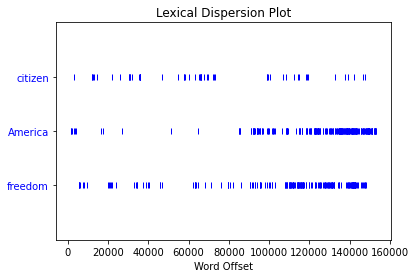

In [18]:
book.text4.dispersion_plot(['citizen', 'America', 'freedom'])

In [23]:
!pip install matplotlib

### Frequency Distribution (FreqDist)
- 단어의 빈도수를 활용할 수 있는 많은 메소드를 제공
- 인간의 언어 -> 컴퓨터가 인식
    - 전체 단어 수
    - 특정 단어의 빈도수
    

In [5]:
import nltk
fdist = nltk.FreqDist(book.text1) # 각 토큰의 출현횟수를 담은 FreqDist객체 반환
fdist  # dictionary = key:value

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [35]:
fdist.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

In [37]:
fdist['whale'], book.text1.count('whale')  # 'whale' 등장횟수를 찾는 두가지 방법

(906, 906)

In [38]:
fdist.freq('whale')  # 906 / 260819

0.003473673313677301

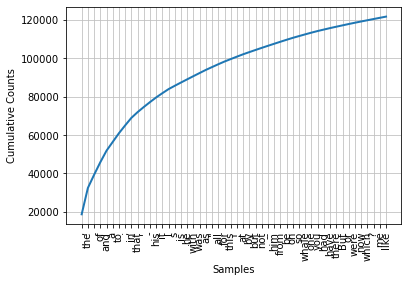

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [7]:
fdist.plot(50, cumulative=True)  # 누적 선 그래프

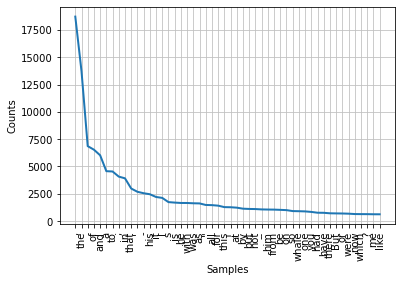

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
fdist.plot(50, cumulative=False)

In [41]:
# 1번 나타나는 단어들
len(fdist.hapaxes())  # 중복 X, 대소문자는 구분됨
# hapax: 한번 밖에 사용된 적 없는 단어

9002

### 리스트 & 리스트 컴프리헨션
- 리스트: 배열(array), 리스트(list)
- 하나의 변수에 여러 값을 할당하는 자료형
    - 'a = [1, 2, 3, 4]'
- 대괄호로 선언[  ]
- 내부 요소들은 자료형이 달라도 됨
    - a = [1 ,True, 'hello']
- 순서가 있다 --> 인덱싱, 슬라이싱이 가능
- 빈 리스트 선언: list(), []

In [19]:
a = [1, True, 'hello']
a[::-1]  # 거꾸로 반환

['hello', True, 1]

In [20]:
# 빈 리시트 생성
b = []
b = list()

In [9]:
# 리스트 인덱싱
drinks = ['rum', 'mojito', 'soju']
drinks[-1]

'soju'

In [12]:
# drinks 에서 soju의 위치(오프셋)를 알고싶다.
drinks.index('soju') # O
drinks.find('soju')  # X 리스트는 find 안됨

AttributeError: 'list' object has no attribute 'find'

#### list comprehension
- 지능형 리스트
- 주어진 리스트를 포함하는 새로운 리스트를 형성하는 것
- list + for_loop 한 줄로 해결하는 방식
- [A for A' in B]
    - B에 있는 A'에서 A를 가진 리스트를 반환
    - B: 기존의 리스트
    - A': B의 자료 형태
   - A: 새로운 리스트의 요소들(출력값)

- 조건+ : [A for A' in B if 조건식]
    - [A for A' in B if 조건식 and 조건식,.....]

In [28]:
[d for d in drinks]  # 기본 형식

['rum', 'mojito', 'soju']

In [29]:
[d[0] for d in drinks] 

['r', 'm', 's']

In [31]:
# text1에서 알파벳 수가 10이상인 단어
[b for b in book.text1 if len(b)>=10][:10]

# book.text1 에서 조건식을 만족하는 b의 값을 반환

['Consumptive',
 'threadbare',
 'handkerchief',
 'embellished',
 'signification',
 'DICTIONARY',
 'immediately',
 'RICHARDSON',
 'DICTIONARY',
 'ERROMANGOAN']

In [14]:
# text4에서 'ism'를 포함하는 단어 반환
[word for word in book.text4 if 'ism' in word][:10]

['patriotism',
 'patriotism',
 'despotism',
 'patriotism',
 'dismember',
 'patriotism',
 'patriotism',
 'patriotism',
 'patriotism',
 'patriotism']

In [ ]:
#중요# 
# text4에서 'ism'를 포함하는 단어 반환 (중복 X 버전)
# set처리를 어디서 하냐에 따라 결과값이 다르게 나온다
# 순서의 차이

a = [word for word in set(book.text4) if 'ism' in word]
    # set 처리 후 연산 진행
    # 최종결과: 리스트
b = set([word for word in book.text4 if 'ism' in word])
    # 연산 후 set 처리
    # 최종결과: set

In [25]:
# 결과값 모두 소문자로 변환

a = [word.lower() for word in set(book.text4) if 'ism' in word]
    # 대소문자 구분 O
    # set는 patriotism이랑 Patriotism 구분 함.
b = set([word.lower() for word in book.text4 if 'ism' in word])
    # 대소문자 구분 X
    # patriotism이랑 Patriotism 모두 소문자화 시킨 후 중복처리
len(a), len(b)

(35, 32)

In [24]:
'ism' in 'patriotism'

True

In [23]:
# if a == True: 이런 식으로 쓰면 안됨 
a = True
if a:

IndentationError: expected an indented block (Temp/ipykernel_13576/2934791096.py, line 2)

### 조건을 위한 함수: uncased, cased
- 'the' != 'The'
- upper(), lower(), title()
- capitalize(), swapcase()
- isupper(), islower(), istitle()
- endswith(), startswith(), isalpha()

In [33]:
'word'.upper()  # 모든 글자 대문자화
'word'.title()  # 첫 글자만 대문자화

'Word'

In [42]:
'WORD'.isupper()  # True
'worD'.islower()  # False
'Word'.istitle()  # True

True

In [37]:
'word'.startswith('w')  # True
'word'.endswith('rd')  # True
'1234'.isalpha()  # string이 알파벳인지 아닌지 판정

False

In [36]:
'word'.capitalize()  
'wOrD'.swapcase()  # 대소문자 변환

'WoRd'

In [50]:
# text1에서 'eign'로 끝나는 단어 반환(10개만)
[word for word in book.text1 if word.endswith('eign')][:10]

['sovereign',
 'foreign',
 'reign',
 'foreign',
 'foreign',
 'reign',
 'foreign',
 'foreign',
 'foreign',
 'foreign']

In [46]:
# text3에서 대문자로 시작하는 단어들 중에 길이가 3이상인 단어 -> 중복 없이 -> 대문자로 변환

set([word.upper() for word in book.text3 if word.istitle() and len(word) >= 3])

{'ABEL',
 'ABELMIZRAIM',
 'ABIDAH',
 'ABIDE',
 'ABIMAEL',
 'ABIMELECH',
 'ABR',
 'ABRAH',
 'ABRAHAM',
 'ABRAM',
 'ACCAD',
 'ACHBOR',
 'ADAH',
 'ADAM',
 'ADBEEL',
 'ADMAH',
 'ADULLAMITE',
 'AFTER',
 'AHOLIBAMAH',
 'AHUZZATH',
 'AJAH',
 'AKAN',
 'ALL',
 'ALLONBACHUTH',
 'ALMIGHTY',
 'ALMODAD',
 'ALSO',
 'ALVAH',
 'ALVAN',
 'AMAL',
 'AMALEK',
 'AMALEKITES',
 'AMMON',
 'AMORITE',
 'AMORITES',
 'AMRAPHEL',
 'ANAH',
 'ANAMIM',
 'AND',
 'ANER',
 'ANGEL',
 'APPOINT',
 'ARAM',
 'ARAN',
 'ARARAT',
 'ARBAH',
 'ARD',
 'ARE',
 'ARELI',
 'ARIOCH',
 'ARISE',
 'ARKITE',
 'ARODI',
 'ARPHAXAD',
 'ART',
 'ARVADITE',
 'ASENATH',
 'ASHBEL',
 'ASHER',
 'ASHKENAZ',
 'ASHTEROTH',
 'ASK',
 'ASSHUR',
 'ASSHURIM',
 'ASSYR',
 'ASSYRIA',
 'ATAD',
 'AVITH',
 'BAALHANAN',
 'BABEL',
 'BASHEMATH',
 'BECAUSE',
 'BECHER',
 'BEDAD',
 'BEERI',
 'BEERLAHAIROI',
 'BEERSHEBA',
 'BEHOLD',
 'BELA',
 'BELAH',
 'BENAM',
 'BENJAMIN',
 'BENO',
 'BEOR',
 'BERA',
 'BERED',
 'BERIAH',
 'BETHEL',
 'BETHLEHEM',
 'BETHUEL',
 'BEWARE',
 

In [49]:
# text4에서 알바벳인 단어 중, 길이가 4개 이상이고, 빈도수가 5 이상인 단어의 길이 반환(10개만)

fdist = nltk.FreqDist(book.text4)
[len(word) for word in book.text4 if word.isalpha() and len(word) >= 4 and fdist[word] >= 5][:10]

[6, 8, 6, 5, 15, 12, 8, 4, 5, 5]

In [56]:
# fdist 활용해서 같은 결과 가져오기

[len(word) for (word,count) in fdist.items()\
        if len(word) >= 4 and (count >= 5)][:10]

[6, 8, 6, 5, 15, 12, 8, 4, 5, 5]

In [57]:
## fdist.items
    # text4의 모든 단어들이 (word,count)의 형태로 묶임
list(fdist.items())[:10]

[('Fellow', 24),
 ('-', 294),
 ('Citizens', 7),
 ('of', 7169),
 ('the', 9555),
 ('Senate', 12),
 ('and', 5226),
 ('House', 9),
 ('Representatives', 5),
 (':', 160)]

### 리스트, 스트링
- str.split(): 문자열 => 리스트
- sep.join(list): 리스트 => 문자열

In [64]:
sent1 = 'I am thirsty'
# tokens = ['I', 'am', 'thirsty']

In [65]:
sent1.split() # 디폴트는 공백을 기준으로 split

['I', 'am', 'thirsty']

In [2]:
sent2 = 'I, am, thirsty'
sent2.split(',')  # ','를 기준으로 split

['I', ' am', ' thirsty']

In [5]:
# am 앞에 공백 없애고 싶을 때 => list comprehension 활용
sent2 = 'I, am, thirsty'
tokens = sent2.split(',')
tokens

['I', ' am', ' thirsty']

In [10]:
tokens_strip = [word.strip() for word in tokens]
tokens_strip

['I', 'am', 'thirsty']

In [12]:
# sep.join(list): 리스트에서 문자열로 변환, 공백에 '-' 삽입
'-'.join(tokens_strip)

'I-am-thirsty'

## 반복문
- '[word for word in text1]'
- 자료구조를 순회할 때 사용함
- 정해진 동작을 반복적으로 수행할 때 내리는 명령어
- 시작조건, 종료조거느 수행명령으로 구성됨
- for 요소 in 반복범위:
        수행명령
- for, while
- 들여쓰기, 블록 => 논리구조
- 무한루프가 되지 않도록 주의

In [19]:
import nltk
from nltk.book import *
nltk.download('book', quiet=True)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


True

In [110]:
# [word for word in text1]
for word in text1[:10]:
    print(word)

[
Moby
Dick
by
Herman
Melville
1851
]
ETYMOLOGY
.


In [108]:
[word for word in text1[:10]]  # 리스트에 담음

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [111]:
alphabet = ['a', 'b', 'c']
for w in alphabet:
    print(w)  # 하나씩 순차적으로 출력

a
b
c


In [112]:
# 숫자반복: range()(start, end, step)
    # start는 인덱싱과 마찬가지로 0부터 시작함
    
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [15]:
# 1부터 10까지 출력하고 싶다면
    # end +1 해줘야 함
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [16]:
# 1부터 9까지 2스텝씩 출력
for i in range(1, 10, 2):
    print(i)

1
3
5
7
9


In [20]:
# text1-9 각 텍스트의 단어 수를 반환

text = [text1, text2, text3, text4, text5, text6, text7, text8, text9]
for i in text:
    print('{}의 단어 수는: '.format(i), len(i))

<Text: Moby Dick by Herman Melville 1851>의 단어 수는:  260819
<Text: Sense and Sensibility by Jane Austen 1811>의 단어 수는:  141576
<Text: The Book of Genesis>의 단어 수는:  44764
<Text: Inaugural Address Corpus>의 단어 수는:  152901
<Text: Chat Corpus>의 단어 수는:  45010
<Text: Monty Python and the Holy Grail>의 단어 수는:  16967
<Text: Wall Street Journal>의 단어 수는:  100676
<Text: Personals Corpus>의 단어 수는:  4867
<Text: The Man Who Was Thursday by G . K . Chesterton 1908>의 단어 수는:  69213


### 출력 포매팅
- 1. f'str ... {var}'
    - f, F 둘 다 가능
- 2. %
    - '... %자료형' %var
- 3. '..{}'.format(var)
    - 1, 3번은 가독성의 차이
    - 2번 방식은 잘 사용하지 않음

In [21]:
name = 'Hoo'
print('My name is ###')

My name is ###


In [22]:
print(f'My name is {name}')

My name is Hoo


In [25]:
print('My name is %s' %name)  # 정수형 %d, 실수형 %f

My name is Hoo


In [24]:
print('My name is {}'.format(name))

My name is Hoo


In [35]:
age = 23

In [36]:
print(f'My name is {name}, and I am {age} years old.')

My name is Hoo, and I am 23 years old.


In [37]:
print('My name is {}, and I am {} years old.'.format(name, age))

My name is Hoo, and I am 23 years old.


In [39]:
name = 'Hoooo'
age = 23.1234
print('My name is {:.1}, and I am {:.2} years old.'.format(name, age))  # 문자열도 짤림

My name is H, and I am 2.3e+01 years old.


In [144]:
a = 0.55555555
print('My name is %.3f' %a)

My name is 0.556


# 4주차 Quiz 복습

In [2]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [9]:
# text1~9 중 가장 어휘가 풍부한 코퍼스는?
# lexical diversity 활용

text = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

for i in text:
    print(len(set(i))/len(i))

# text8이 가장 풍부

0.07406285585022564
0.04826383002768831
0.06230453042623537
0.06556530042314962
0.13477005109975562
0.1276595744680851
0.12324685128531129
0.22765564002465585
0.0983485761345412


In [11]:
# text4에서 democracy는 몇 번 나오는지 출력하시오.

fdist = FreqDist(text4)
fdist['democracy']

65

In [14]:
# text4에서는 한 번 출현하지만 text3에서는 여러 번 출현하는 단어는 몇 개인지 출력

a = [word for word in text4 if fdist[word] == 1]
b = [word for word in text3 if fdist[word] >= 1]
words = []
for i in a:
    if i in b:
        words.append(i)
print(len(words))

192


In [21]:
# text5에서 4번 출현하는 단어들을 중복되지 않게 오름차순으로 출력

set(sorted([word for word in text5 if fdist[word] == 4])[:10])

{'$', 'Again', 'An', 'Change', 'First', 'History', 'Look', 'None'}

In [22]:
# text7에서 가장 긴 단어는 몇 자인가?

words=[]
for i in text7:
    words.append(len(i))
print(max(words))
        

24


In [25]:
print('고급 파이썬 프로그래밍\\Advanced Python programming')
print('\t\"이 수업은 금요일에 진행됩니다.\"\n')
print('수업은 실시간 강의로 진행됩니다.')
print('\t-질의사항은 조교에게 메일로 보내주세요')

고급 파이썬 프로그래밍\Advanced Python programming
	"이 수업은 금요일에 진행됩니다."

수업은 실시간 강의로 진행됩니다.
	-질의사항은 조교에게 메일로 보내주세요


In [28]:
# text4에서 4자리 단어만 출력하세요
words = []
for i in text4:
    if len(i) == 4:
        words.append(i)
print(words[:10])

['life', 'have', 'with', 'than', 'that', 'your', '14th', 'hand', 'hear', 'with']
